In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import calendar
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = pd.read_csv("model.csv", sep='\t', encoding='utf-8') 

In [3]:
model.head(5)

,Unnamed: 0,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,0,AL - 01,2014-01-01,1687.0,94,609.61,NaN,NaN,Southern Group,AL,NaN,Jan,2014
1,1,AL - 01,2014-01-02,2182.0,116,577.59,NaN,NaN,Southern Group,AL,NaN,Jan,2014
2,2,AL - 01,2014-01-03,2772.0,145,717.09,NaN,NaN,Southern Group,AL,NaN,Jan,2014
3,3,AL - 01,2014-01-04,2253.0,99,705.19,NaN,NaN,Southern Group,AL,NaN,Jan,2014
4,4,AL - 01,2014-01-05,1390.0,70,626.58,NaN,NaN,Southern Group,AL,NaN,Jan,2014


In [4]:
model.columns

Index(['Unnamed: 0', 'Restaurant Name', 'Date', 'Net Sales', 'POS Checks',
       'Labor Cost', 'Game Revenue', 'Go Live Date', 'Franchise/Owner',
       'State', 'Presto Devices Installed', 'Month', 'Year'],
      dtype='object')

In [5]:
model.drop('Unnamed: 0', axis=1, inplace=True)
model.head()

,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,AL - 01,2014-01-01,1687.0,94,609.61,NaN,NaN,Southern Group,AL,NaN,Jan,2014
1,AL - 01,2014-01-02,2182.0,116,577.59,NaN,NaN,Southern Group,AL,NaN,Jan,2014
2,AL - 01,2014-01-03,2772.0,145,717.09,NaN,NaN,Southern Group,AL,NaN,Jan,2014
3,AL - 01,2014-01-04,2253.0,99,705.19,NaN,NaN,Southern Group,AL,NaN,Jan,2014
4,AL - 01,2014-01-05,1390.0,70,626.58,NaN,NaN,Southern Group,AL,NaN,Jan,2014


In [6]:
model['Date'] = pd.to_datetime(model['Date'] )

model['Month'] = model['Date'].dt.month
model['Year'] = model['Date'].dt.year

In [7]:
dtype(model['Date'])

dtype('<M8[ns]')

In [8]:
model.head(2)

,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,AL - 01,2014-01-01,1687.0,94,609.61,NaN,NaN,Southern Group,AL,NaN,1,2014
1,AL - 01,2014-01-02,2182.0,116,577.59,NaN,NaN,Southern Group,AL,NaN,1,2014


In [9]:
model.corr()

,Net Sales,POS Checks,Labor Cost,Game Revenue,Presto Devices Installed,Month,Year
Net Sales,1.000000,0.936399,0.716533,0.927921,-0.036045,-0.102050,0.053543
POS Checks,0.936399,1.000000,0.658830,0.995452,0.001058,-0.120399,0.040480
Labor Cost,0.716533,0.658830,1.000000,0.616967,-0.133592,-0.150133,-0.039540
Game Revenue,0.927921,0.995452,0.616967,1.000000,0.019635,-0.128057,0.095137
Presto Devices Installed,-0.036045,0.001058,-0.133592,0.019635,1.000000,0.005699,-0.026119
Month,-0.102050,-0.120399,-0.150133,-0.128057,0.005699,1.000000,-0.468883
Year,0.053543,0.040480,-0.039540,0.095137,-0.026119,-0.468883,1.000000


In [10]:
# Drop Columns where the devices were never installed 
model  = model.drop(model[model['Go Live Date'].isnull()].index)

#model[model['Go Live Date'].isnull()].count()

In [11]:
#sns.pairplot(model)

In [12]:
'''
x_cols = [i for i in model.columns if i!='Sales']
# create X and y
X =model[x_cols]

sns.pairplot(model, x_vars=X, y_vars='Sales', height=6, aspect=0.7)
'''


"\nx_cols = [i for i in model.columns if i!='Sales']\n# create X and y\nX =model[x_cols]\n\nsns.pairplot(model, x_vars=X, y_vars='Sales', height=6, aspect=0.7)\n"

In [13]:
model.shape

(29689, 12)

In [14]:
model.describe()

,Net Sales,POS Checks,Labor Cost,Game Revenue,Presto Devices Installed,Month,Year
count,29689.000000,29689.000000,29689.000000,22080.000000,29689.000000,29689.000000,29689.000000
mean,3154.503646,142.428239,660.514067,14.487096,45.582438,5.670989,2014.168514
std,1452.292802,59.697078,277.531567,4.620758,5.643144,3.538773,0.374328
min,128.000000,10.000000,45.270000,3.833333,25.000000,1.000000,2014.000000
25%,2114.000000,100.000000,454.270000,11.166667,42.000000,3.000000,2014.000000
50%,2863.000000,132.000000,606.630000,13.750000,45.000000,5.000000,2014.000000
75%,3896.000000,174.000000,814.020000,17.000000,50.000000,9.000000,2014.000000
max,12092.000000,513.000000,2632.237900,44.333333,55.000000,12.000000,2015.000000


In [15]:
model.isna().sum()

Restaurant Name                0
Date                           0
Net Sales                      0
POS Checks                     0
Labor Cost                     0
Game Revenue                7609
Go Live Date                   0
Franchise/Owner                0
State                          0
Presto Devices Installed       0
Month                          0
Year                           0
dtype: int64

In [16]:
model.head()

,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
451,AL - 02,2014-01-01,2099.0,111,453.52,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
452,AL - 02,2014-01-02,2568.0,141,583.92,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
453,AL - 02,2014-01-03,3699.0,184,792.10,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
454,AL - 02,2014-01-04,3590.0,158,736.96,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
455,AL - 02,2014-01-05,2420.0,105,599.29,NaN,2014-11-24,Southern Group,AL,43.0,1,2014


In [17]:
model.to_csv('Version1.csv', sep='\t', encoding='utf-8')

In [18]:
df = pd.read_csv("Version1.csv", sep='\t', encoding='utf-8') 

In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,AL - 02,2014-01-01,2099.0,111,453.52,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
1,AL - 02,2014-01-02,2568.0,141,583.92,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
2,AL - 02,2014-01-03,3699.0,184,792.10,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
3,AL - 02,2014-01-04,3590.0,158,736.96,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
4,AL - 02,2014-01-05,2420.0,105,599.29,NaN,2014-11-24,Southern Group,AL,43.0,1,2014


In [20]:
df.dtypes

Restaurant Name              object
Date                         object
Net Sales                   float64
POS Checks                    int64
Labor Cost                  float64
Game Revenue                float64
Go Live Date                 object
Franchise/Owner              object
State                        object
Presto Devices Installed    float64
Month                         int64
Year                          int64
dtype: object

In [21]:
df.head()

,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,AL - 02,2014-01-01,2099.0,111,453.52,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
1,AL - 02,2014-01-02,2568.0,141,583.92,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
2,AL - 02,2014-01-03,3699.0,184,792.10,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
3,AL - 02,2014-01-04,3590.0,158,736.96,NaN,2014-11-24,Southern Group,AL,43.0,1,2014
4,AL - 02,2014-01-05,2420.0,105,599.29,NaN,2014-11-24,Southern Group,AL,43.0,1,2014


In [22]:
# Data Types
# Categorical Features
print('Categorical Features:\n ', df.select_dtypes(include=['object']).columns)
print('--'*40)

# Numeric Features
print('Numeric Features:\n ', df.select_dtypes(exclude=['object']).columns)

Categorical Features:
  Index(['Restaurant Name', 'Date', 'Go Live Date', 'Franchise/Owner', 'State'], dtype='object')
--------------------------------------------------------------------------------
Numeric Features:
  Index(['Net Sales', 'POS Checks', 'Labor Cost', 'Game Revenue',
       'Presto Devices Installed', 'Month', 'Year'],
      dtype='object')


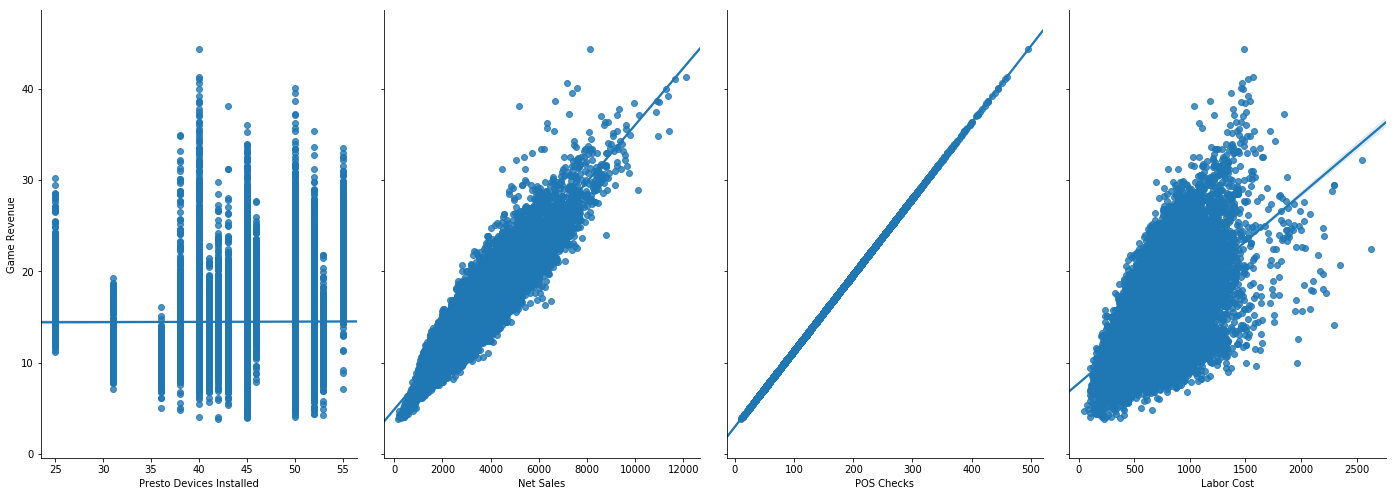

In [23]:
sns.pairplot(df, x_vars=['Presto Devices Installed','Net Sales','POS Checks','Labor Cost'], y_vars='Game Revenue', height=7, aspect=0.7, kind='reg')

In [24]:
'''
# scatter plot in Pandas
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='Presto Devices Installed', y='Game Revenue', ax=axs[0], figsize=(16, 6))
df.plot(kind='scatter', x='Labor Cost', y='Game Revenue', ax=axs[1])
df.plot(kind='scatter', x='Net Sales', y='Game Revenue', ax=axs[2])
df.plot(kind='scatter', x='POS Checks', y='Game Revenue', ax=axs[3])
'''


"\n# scatter plot in Pandas\nfig, axs = plt.subplots(1, 4, sharey=True)\ndf.plot(kind='scatter', x='Presto Devices Installed', y='Game Revenue', ax=axs[0], figsize=(16, 6))\ndf.plot(kind='scatter', x='Labor Cost', y='Game Revenue', ax=axs[1])\ndf.plot(kind='scatter', x='Net Sales', y='Game Revenue', ax=axs[2])\ndf.plot(kind='scatter', x='POS Checks', y='Game Revenue', ax=axs[3])\n"

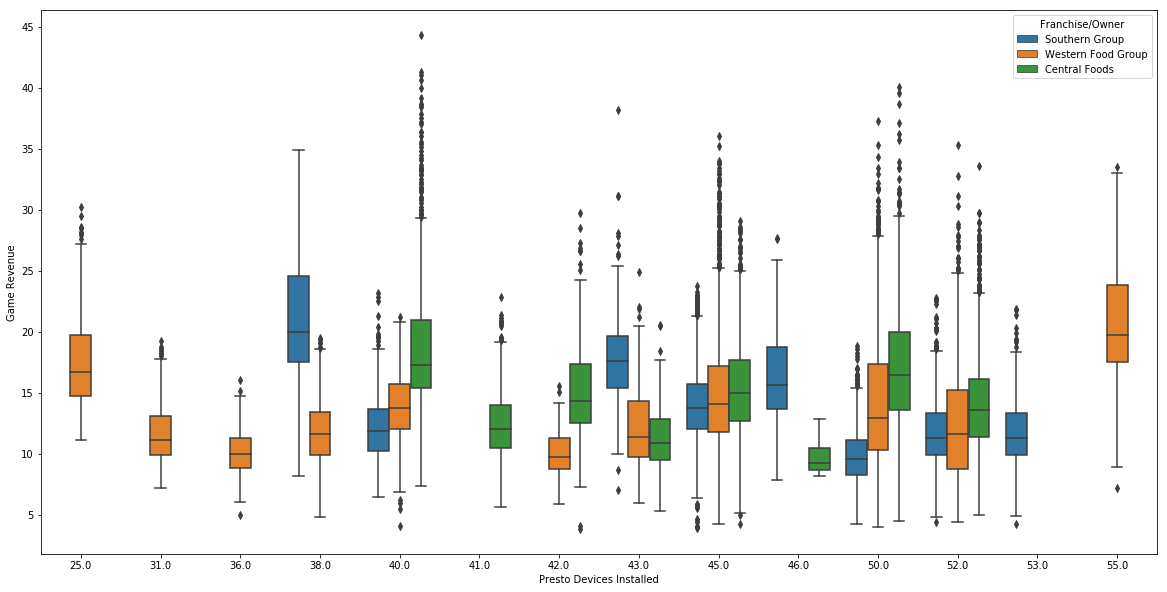

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Presto Devices Installed',y='Game Revenue',hue='Franchise/Owner',data=df)

In [26]:
''' 
catcols = model.select_dtypes(['object'])
for cat in catcols:
    print('--'*40)
    print(cat)
    print(model[cat].value_counts())
'''


" \ncatcols = model.select_dtypes(['object'])\nfor cat in catcols:\n    print('--'*40)\n    print(cat)\n    print(model[cat].value_counts())\n"

In [27]:
dtype(df['Game Revenue'])

dtype('float64')

In [28]:
#df['Game Revenue']= df['Game Revenue'].astype(float32)
#df['Game Revenue']

pd.set_option('display.float_format', '{:.8f}'.format)



df.head(5)



,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,AL - 02,2014-01-01,2099.00000000,111,453.52000000,nan,2014-11-24,Southern Group,AL,43.00000000,1,2014
1,AL - 02,2014-01-02,2568.00000000,141,583.92000000,nan,2014-11-24,Southern Group,AL,43.00000000,1,2014
2,AL - 02,2014-01-03,3699.00000000,184,792.10000000,nan,2014-11-24,Southern Group,AL,43.00000000,1,2014
3,AL - 02,2014-01-04,3590.00000000,158,736.96000000,nan,2014-11-24,Southern Group,AL,43.00000000,1,2014
4,AL - 02,2014-01-05,2420.00000000,105,599.29000000,nan,2014-11-24,Southern Group,AL,43.00000000,1,2014


Revenue Statistical Summary:

count   22080.00000000
mean       14.48709617
std         4.62075829
min         3.83333333
25%        11.16666667
50%        13.75000000
75%        17.00000000
max        44.33333333
Name: Game Revenue, dtype: float64
Median Game Price: 13.75
Skewness: 1.003270050912305


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


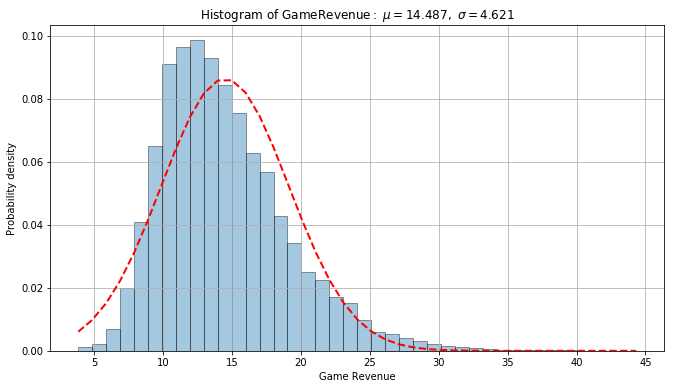

In [29]:
# Statistical Summary
print("Revenue Statistical Summary:\n")
print(df['Game Revenue'].describe())
print("Median Game Price:", df['Game Revenue'].median(axis = 0))
print('Skewness:',df['Game Revenue'].skew())
skew = df['Game Revenue'].skew()

# mean distribution
mu = df['Game Revenue'].mean()

# std distribution
sigma = df['Game Revenue'].std()
num_bins = 40

# Histogram of SalesPrice
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(df['Game Revenue'], num_bins, density=1,edgecolor = 'black', lw = 1, alpha = .40)

# Normal Distribution
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Game Revenue')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ Game Revenue:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


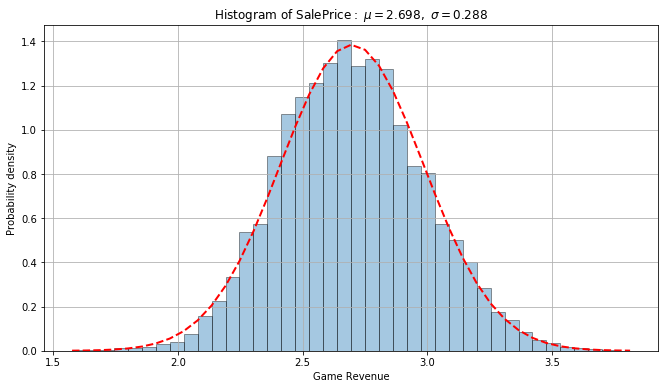

In [30]:

# Normalize SalePrice using log-transformation
game_revenue_norm = np.log1p(df['Game Revenue'])

# Mean distribution
mu = game_revenue_norm.mean()

# Standard distribution
sigma = game_revenue_norm.std()
num_bins = 40
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(game_revenue_norm, num_bins, density=1, edgecolor = 'black', lw = 1,alpha = .40)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Game Revenue')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ SalePrice:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()







In [31]:
df.dropna(inplace=True)

Revenue Statistical Summary:

count   22080.00000000
mean       14.48709617
std         4.62075829
min         3.83333333
25%        11.16666667
50%        13.75000000
75%        17.00000000
max        44.33333333
Name: Game Revenue, dtype: float64
Median Game Price: 13.75
Skewness: 1.0032700509123063


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


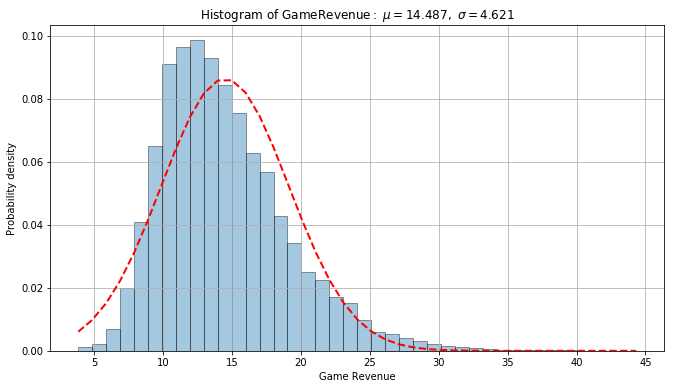

In [32]:
# Statistical Summary
print("Revenue Statistical Summary:\n")
print(df['Game Revenue'].describe())
print("Median Game Price:", df['Game Revenue'].median(axis = 0))
print('Skewness:',df['Game Revenue'].skew())
skew = df['Game Revenue'].skew()

# mean distribution
mu = df['Game Revenue'].mean()

# std distribution
sigma = df['Game Revenue'].std()
num_bins = 40

# Histogram of SalesPrice
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(df['Game Revenue'], num_bins, density=1,edgecolor = 'black', lw = 1, alpha = .40)

# Normal Distribution
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Game Revenue')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ Game Revenue:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()

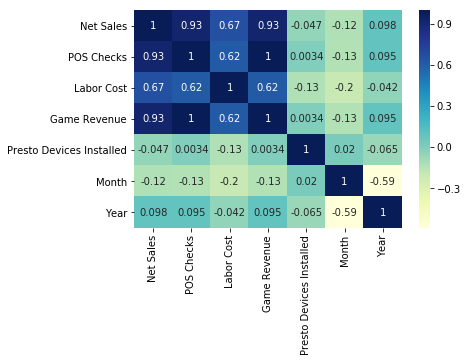

In [33]:
correlation = df.corr() #corr() method of pandas library calculates correlation between columns of dataframe
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()


In [34]:
# Drop columns which will not contribute to the model
df.drop(['Go Live Date','Date','Presto Devices Installed','POS Checks'], axis=1, inplace=True)
#model.drop('Labor Cost', axis=1, inplace=True)

In [35]:
df.dtypes

Restaurant Name     object
Net Sales          float64
Labor Cost         float64
Game Revenue       float64
Franchise/Owner     object
State               object
Month                int64
Year                 int64
dtype: object

In [36]:
df.head()

,Restaurant Name,Net Sales,Labor Cost,Game Revenue,Franchise/Owner,State,Month,Year
327,AL - 02,2706.00000000,568.74000000,16.25000000,Southern Group,AL,11,2014
328,AL - 02,2433.00000000,578.19000000,15.16666667,Southern Group,AL,11,2014
329,AL - 02,2933.00000000,731.56000000,13.75000000,Southern Group,AL,11,2014
330,AL - 02,2417.00000000,697.61000000,13.00000000,Southern Group,AL,11,2014
331,AL - 02,1996.00000000,583.34000000,12.16666667,Southern Group,AL,11,2014


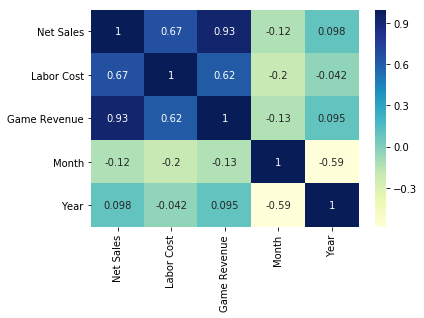

In [37]:
correlation = df.corr() #corr() method of pandas library calculates correlation between columns of dataframe
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()


In [1222]:
#sns.pairplot(model)

In [1223]:
#df.isna().sum()

In [1224]:
#creating dummies for catogorical data 
df = pd.get_dummies(data=df,columns=['Restaurant Name','Franchise/Owner','State'])

In [1243]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df.head(3)

ValueError: Index(['Restaurant Name', 'Net Sales', 'Labor Cost', 'Game Revenue',
       'Franchise/Owner', 'State', 'Month', 'Year'],
      dtype='object'): could not convert string to float: 'AL - 02'

In [1151]:
df.head(2)

,Net Sales,Labor Cost,Game Revenue,Month,Year,Restaurant Name_AL - 02,Restaurant Name_AL - 04,Restaurant Name_AL - 07,Restaurant Name_AL - 08,Restaurant Name_AZ - 01,...,Franchise/Owner_Southern Group,Franchise/Owner_Western Food Group,State_AL,State_AZ,State_CA,State_FL,State_OK,State_OR,State_TX,State_WA
327,2706.00000000,568.74000000,16.25000000,11,2014,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
328,2433.00000000,578.19000000,15.16666667,11,2014,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [1152]:
X = scaled_features_df


In [1246]:
X.head()

,Net Sales,Labor Cost,Month,Year,Restaurant Name_AL - 02,Restaurant Name_AL - 04,Restaurant Name_AL - 07,Restaurant Name_AL - 08,Restaurant Name_AZ - 01,Restaurant Name_AZ - 02,...,Franchise/Owner_Southern Group,Franchise/Owner_Western Food Group,State_AL,State_AZ,State_CA,State_FL,State_OK,State_OR,State_TX,State_WA
327,-0.27467712,-0.30245892,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667
328,-0.47240579,-0.26809754,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667
329,-0.11026537,0.28957504,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667
330,-0.48399428,0.16612858,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667
331,-0.78891651,-0.24937149,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667


In [1244]:
y = df['Game Revenue']

In [1245]:
X.drop('Game Revenue', axis=1, inplace=True)


KeyError: "['Game Revenue'] not found in axis"

In [1156]:
#correlation = df.corr() #corr() method of pandas library calculates correlation between columns of dataframe
#sns.heatmap(correlation,cmap="YlGnBu",annot=True)
#plt.show()

In [1157]:
X.head(3)

,Net Sales,Labor Cost,Month,Year,Restaurant Name_AL - 02,Restaurant Name_AL - 04,Restaurant Name_AL - 07,Restaurant Name_AL - 08,Restaurant Name_AZ - 01,Restaurant Name_AZ - 02,...,Franchise/Owner_Southern Group,Franchise/Owner_Western Food Group,State_AL,State_AZ,State_CA,State_FL,State_OK,State_OR,State_TX,State_WA
327,-0.27467712,-0.30245892,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667
328,-0.47240579,-0.26809754,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667
329,-0.11026537,0.28957504,1.38306857,-0.53188389,13.36084560,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,1.95230781,-0.84420971,4.61796291,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,-0.67910766,-0.25448667


In [1158]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [1159]:
# setting the test and train set at 80/20 ratio where test data is 20 percent of train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)  

In [1160]:
#X_train.columns

In [1161]:
#X_test

In [1162]:
X_train.head(2)

,Net Sales,Labor Cost,Month,Year,Restaurant Name_AL - 02,Restaurant Name_AL - 04,Restaurant Name_AL - 07,Restaurant Name_AL - 08,Restaurant Name_AZ - 01,Restaurant Name_AZ - 02,...,Franchise/Owner_Southern Group,Franchise/Owner_Western Food Group,State_AL,State_AZ,State_CA,State_FL,State_OK,State_OR,State_TX,State_WA
18189,-0.41229048,-1.64080766,0.55281380,-0.53188389,-0.07484556,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,-0.51221431,1.18453979,-0.21654570,-0.28604656,-0.54818477,-0.44136741,-0.25357751,4.42468295,-0.67910766,-0.25448667
23770,-0.11098965,-0.79086331,0.55281380,-0.53188389,-0.07484556,-0.07298727,-0.11696590,-0.14440095,-0.14390990,-0.05219958,...,-0.51221431,-0.84420971,-0.21654570,-0.28604656,-0.54818477,-0.44136741,-0.25357751,-0.22600489,1.47252057,-0.25448667


In [1163]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler

regressor = LinearRegression()  


regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1164]:
#print(regressor.intercept_)  
#print(regressor.coef_) 

In [1180]:
from statsmodels.api import add_constant
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
est.summary()
#print(est2.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Game Revenue   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     3620.
Date:                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:57:11   Log-Likelihood:                -36662.
No. Observations:               22080   AIC:                         7.347e+04
Df Residuals:                   22005   BIC:                         7.407e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 14.4909      0.012   1189.285      0.000      14.467      14.515
Net Sales                              3.9651      0.016    254.087      0.000       3.934       3.996
Labor Cost                             0.0881      0.017      5.191      0.000       0.055       0.121
Month                                 -0.1075      0.013     -8.595      0.000      -0.132      -0.083
Year                                  -0.0698      0.013     -5.411      0.000      -0.095      -0.045
Restaurant Name_AL - 02            -1.757e+10   4.03e+10     -0.436      0.663   -9.66e+10    6.15e+10
Restaurant Name_AL - 04            -1.714e+10   3.93e+10     -0.436      0.663   -9.43e+10       6e+10
Restaurant Name_AL - 07            -2.724e+10   6.25e+10     -0.436      0.663    -1.5e+11    9.53e+10
Restaurant Name_AL - 08             -3.34e+10   7.67e+10     -0.436      0.663   -1.84e+11    1.17e+11
Restaurant Name_AZ - 01            -3.481e+10   7.99e+10     -0.436      0.663   -1.91e+11    1.22e+11
Restaurant Name_AZ - 02            -1.285e+10   2.95e+10     -0.436      0.663   -7.07e+10     4.5e+10
Restaurant Name_AZ - 03            -1.793e+10   4.11e+10     -0.436      0.663   -9.86e+10    6.27e+10
Restaurant Name_AZ - 07            -1.285e+10   2.95e+10     -0.436      0.663   -7.07e+10     4.5e+10
Restaurant Name_AZ - 09            -1.338e+10   3.07e+10     -0.436      0.663   -7.36e+10    4.68e+10
Restaurant Name_AZ - 10            -3.481e+10   7.99e+10     -0.436      0.663   -1.91e+11    1.22e+11
Restaurant Name_AZ - 12            -2.158e+10   4.95e+10     -0.436      0.663   -1.19e+11    7.55e+10
Restaurant Name_AZ - 13            -2.868e+10   6.58e+10     -0.436      0.663   -1.58e+11       1e+11
Restaurant Name_Ca - 01             4.905e+10   1.13e+11      0.436      0.663   -1.72e+11     2.7e+11
Restaurant Name_Ca - 02             5.588e+10   1.28e+11      0.436      0.663   -1.96e+11    3.07e+11
Restaurant Name_Ca - 03             5.139e+10   1.18e+11      0.436      0.663    -1.8e+11    2.83e+11
Restaurant Name_Ca - 06             5.206e+10   1.19e+11      0.436      0.663   -1.82e+11    2.86e+11
Restaurant Name_Ca - 08             4.975e+10   1.14e+11      0.436      0.663   -1.74e+11    2.74e+11
Restaurant Name_Ca - 09             2.707e+10   6.21e+10      0.436      0.663   -9.47e+10    1.49e+11
Restaurant Name_Ca - 10              4.53e+10   1.04e+11      0.436      0.663   -1.59e+11    2.49e+11
Restaurant Name_Ca - 11              4.56e+10   1.05e+11      0.436      0.663    -1.6e+11    2.51e+11
Restaurant Name_Ca - 13             5.132e+10   1.18e+11      0.436      0.663    -1.8e+11    2.82e+11
Restaurant Name_Ca - 14             4.919e+10   1.13e+11      0.436      0.663   -1.72e+11    2.

In [1181]:


list(zip(X, regressor.coef_))

[('Net Sales', 3.9740523948421607),
 ('Labor Cost', 0.07755586947711407),
 ('Month', -0.10269076650608813),
 ('Year', -0.07205995983017928),
 ('Restaurant Name_AL - 02', -128714723070.29242),
 ('Restaurant Name_AL - 04', -125553242064.68063),
 ('Restaurant Name_AL - 07', -199547448407.87112),
 ('Restaurant Name_AL - 08', -244622083731.06177),
 ('Restaurant Name_AZ - 01', 207432385593.5286),
 ('Restaurant Name_AZ - 02', 76590252341.86993),
 ('Restaurant Name_AZ - 03', 106813950957.00566),
 ('Restaurant Name_AZ - 07', 76590252341.91624),
 ('Restaurant Name_AZ - 09', 79708610984.07365),
 ('Restaurant Name_AZ - 10', 207432385593.16714),
 ('Restaurant Name_AZ - 12', 128598193362.0383),
 ('Restaurant Name_AZ - 13', 170884112062.48904),
 ('Restaurant Name_Ca - 01', 64937574634.13328),
 ('Restaurant Name_Ca - 02', 73979102945.48427),
 ('Restaurant Name_Ca - 03', 68035727285.07763),
 ('Restaurant Name_Ca - 06', 68918638461.59653),
 ('Restaurant Name_Ca - 08', 65864959156.0715),
 ('Restaurant Na

In [1166]:
#predicting data on the test set 
y_pred = regressor.predict(X_test) 

In [1167]:
#viewing the actual data vs predicted data 
df20 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df20.head(10)  

,Actual,Predicted
16152,12.25000000,12.02162320
2027,18.91666667,20.61042935
23837,12.16666667,13.20243985
13544,14.08333333,13.34224088
28852,10.00000000,10.35814054
21146,20.83333333,22.31877286
21741,14.41666667,13.20555265
1150,10.33333333,9.75642545
28476,12.25000000,14.82859952
2882,9.33333333,9.39753873


In [1168]:
# calculating the error 
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.9465121396998601
Mean Squared Error: 1.5849281949964606
Root Mean Squared Error: 1.2589393134684692


In [1169]:
#Based on the dataset the model is able to accortaly predict the values 
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.9230


In [1170]:
df.shape

(22080, 87)

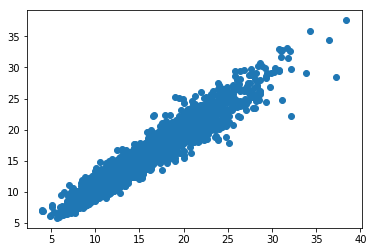

In [1171]:
#plotting the predicted values for the test set and we can see that the model was able to predict the revenue accurately 
plt.scatter(y_test,y_pred)

In [915]:
# Random Forest Regression with Best Features
# Split
# Create matrix of best x features
X_best = X[['Net Sales', 'Restaurant Name_OK- 05', 'Restaurant Name_OK- 06', 'Restaurant Name_OR - 01', 'State_OK', 'Franchise/Owner_Central Foods', 
               'Restaurant Name_Ca - 06', 'Restaurant Name_AZ - 01', 'Restaurant Name_FL - 03', 'Franchise/Owner_Southern Group', 'Restaurant Name_OK- 04', 'Restaurant Name_Ca - 13', 
               'Month', 'State_WA', 'State_FL','Restaurant Name_WA - 07','Restaurant Name_Ca - 03']]



# Split training data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, ytest = train_test_split(X_best,y, test_size = .20,random_state = 2)

#print(X_train, X_test, y_train, ytest)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


y_pred = regressor.predict(X_test) 


In [916]:
# calculating the error 
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 1.109270396233064
Mean Squared Error: 2.23687446853793
Root Mean Squared Error: 1.4956184234415977


In [917]:
#Based on the dataset the model is able to accortaly predict the values 
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.8962


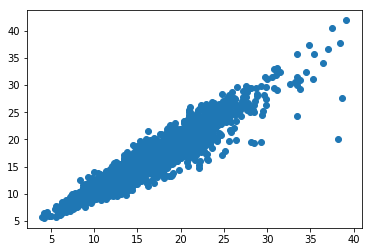

In [918]:
#plotting the predicted values for the test set and we can see that the model was able to predict the revenue accurately 
plt.scatter(y_test,y_pred)

In [856]:
#ya

In [891]:
# Fit
# Import model
from sklearn.linear_model import Lasso

# Instantiate object
lasso = Lasso()

# Fit model to training data
lasso = lasso.fit(X_train, y_train)  

# Predict
y_pred_lasso = lasso.predict(X_test)

# Score It
from sklearn import metrics
print('Linear Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE',metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_lasso))

# Lasso Coefficients
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cdf = pd.DataFrame(data = lasso.coef_,index = X_train.columns, columns = ['Lasso Coefficients'])
# **RANDOM FOREST**
cdf.sort_values(by = 'Lasso Coefficients', ascending = False)

Linear Regression Performance
MAE 1.5059190868363002
MSE 3.8353589735747304
RMSE 1.9584072542693285
R^2 = 0.8219735293306627


,Lasso Coefficients
Net Sales,3.30
Restaurant Name_TX - 10,0.00
Restaurant Name_TX - 19,0.00
Restaurant Name_TX - 18,0.00
Restaurant Name_TX - 17,0.00
Restaurant Name_TX - 15,0.00
Restaurant Name_TX - 14,0.00
Restaurant Name_TX - 13,0.00
Restaurant Name_TX - 12,0.00
Restaurant Name_TX - 11,0.00


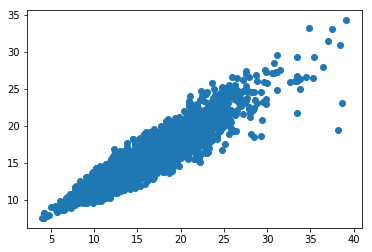

In [893]:
#plotting the predicted values for the test set and we can see that the model was able to predict the revenue accurately 
plt.scatter(y_test,y_pred_lasso)

In [858]:
# Select top 20% of features



# Feature Selector
# Import
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

In [894]:
support = np.asarray(selector_f.get_support())

# Supress displaying long numbers in scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Enable scientific notation
#pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(X.columns.values)
features_with_support = features[support]
# print('Top 20% of the best, associated features to SalePrice\n',columns_with_support)
# print('Number of Features:', len(columns_with_support))

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

Top 20% best associated features to SalePrice
Number of features: 17
                                   F-score  p-value
Net Sales                      143865.8718   0.0000
Restaurant Name_OK- 05           1196.5688   0.0000
Restaurant Name_OK- 06           1051.4720   0.0000
Restaurant Name_OR - 01           856.9145   0.0000
State_OK                          833.3314   0.0000
Franchise/Owner_Central Foods     723.8883   0.0000
Restaurant Name_Ca - 06           666.7924   0.0000
Restaurant Name_AZ - 01           636.2089   0.0000
Restaurant Name_FL - 03           493.7796   0.0000
Franchise/Owner_Southern Group    473.8698   0.0000
Restaurant Name_OK- 04            445.0300   0.0000
Restaurant Name_Ca - 13           394.0675   0.0000
Month                             385.7522   0.0000
State_WA                          366.5026   0.0000
State_FL                          362.8656   0.0000
Restaurant Name_WA - 07           313.3574   0.0000
Restaurant Name_Ca - 03           308.7471   0.

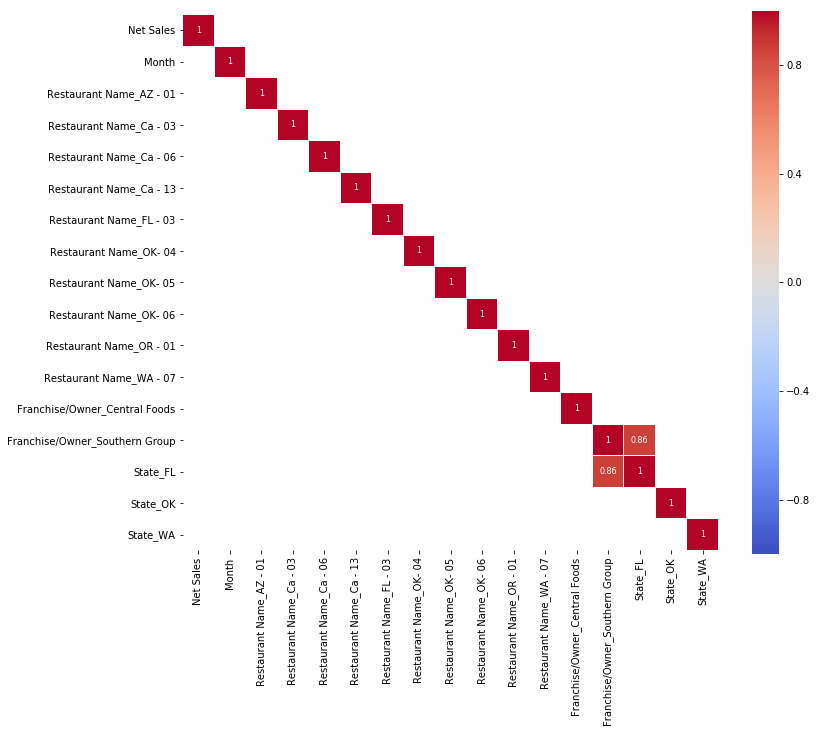

In [900]:
best_feat = X[features_with_support]
corr =best_feat.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [901]:
# Correlations to SalePrice
from scipy import stats
print('Correlation to Game Revenue')
print('State_OK',stats.pearsonr(best_feat['State_OK'],df['Game Revenue'])[0])
print('Restaurant Name_OK- 06',stats.pearsonr(best_feat['Restaurant Name_OK- 06'],df['Game Revenue'])[0])


Correlation to Game Revenue
State_OK 0.19071449541498117
Restaurant Name_OK- 06 0.21321413506237744


In [902]:
X.head(2)

,Net Sales,Month,Year,Restaurant Name_AL - 02,Restaurant Name_AL - 04,Restaurant Name_AL - 07,Restaurant Name_AL - 08,Restaurant Name_AZ - 01,Restaurant Name_AZ - 02,Restaurant Name_AZ - 03,...,Franchise/Owner_Southern Group,Franchise/Owner_Western Food Group,State_AL,State_AZ,State_CA,State_FL,State_OK,State_OR,State_TX,State_WA
327,-0.2747,1.3831,-0.5319,13.3608,-0.0730,-0.1170,-0.1444,-0.1439,-0.0522,-0.0730,...,1.9523,-0.8442,4.6180,-0.2860,-0.5482,-0.4414,-0.2536,-0.2260,-0.6791,-0.2545
328,-0.4724,1.3831,-0.5319,13.3608,-0.0730,-0.1170,-0.1444,-0.1439,-0.0522,-0.0730,...,1.9523,-0.8442,4.6180,-0.2860,-0.5482,-0.4414,-0.2536,-0.2260,-0.6791,-0.2545


In [1196]:
# Random Forest Regression with Best Features
# Split
# Create matrix of best x features
X_best = X[['Net Sales', 'Restaurant Name_OK- 05', 'Restaurant Name_OK- 06', 'Restaurant Name_OR - 01', 'State_OK', 'Franchise/Owner_Central Foods', 
               'Restaurant Name_Ca - 06', 'Restaurant Name_AZ - 01', 'Restaurant Name_FL - 03', 'Franchise/Owner_Southern Group', 'Restaurant Name_OK- 04', 'Restaurant Name_Ca - 13', 
               'Month', 'State_WA', 'State_FL','Restaurant Name_WA - 07','Restaurant Name_Ca - 03']]



# Split training data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, ytest = train_test_split(X_best,y, test_size = .20,random_state = 5)

#print(X_train, X_test, y_train, ytest)


# Fit
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 

rforest.fit(X_train,y_train)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('Random Forest Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

Random Forest Regression Performance
MAE 1.1960071999033355
MSE 2.621743535496688
RMSE 1.6191798959648331
R^2 = 0.8726069287680003


In [1197]:
#viewing the actual data vs predicted data 
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rforest})  
df_new.head(10) 

,Actual,Predicted
16152,12.25000000,13.88694444
2027,18.91666667,21.04611111
23837,12.16666667,12.12611111
13544,14.08333333,13.68500000
28852,10.00000000,11.30472222
21146,20.83333333,25.96916667
21741,14.41666667,12.32371296
1150,10.33333333,10.43055556
28476,12.25000000,15.38686574
2882,9.33333333,11.40750000


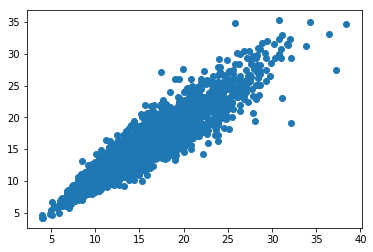

In [1198]:
plt.scatter(y_test,y_pred_rforest)

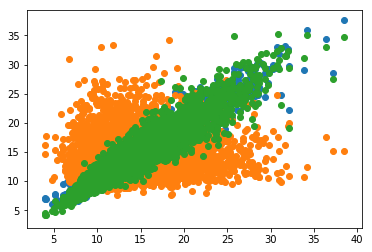

In [1199]:
# scatter plot in Pandas

plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_pred_lasso)
plt.scatter(y_test,y_pred_rforest)

In [1205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn import decomposition

In [38]:
df.head()

,Restaurant Name,Net Sales,Labor Cost,Game Revenue,Franchise/Owner,State,Month,Year
327,AL - 02,2706.00000000,568.74000000,16.25000000,Southern Group,AL,11,2014
328,AL - 02,2433.00000000,578.19000000,15.16666667,Southern Group,AL,11,2014
329,AL - 02,2933.00000000,731.56000000,13.75000000,Southern Group,AL,11,2014
330,AL - 02,2417.00000000,697.61000000,13.00000000,Southern Group,AL,11,2014
331,AL - 02,1996.00000000,583.34000000,12.16666667,Southern Group,AL,11,2014


In [42]:
df1= pd.read_csv("model.csv", sep='\t', encoding='utf-8') 

In [43]:
df1.shape

(43063, 13)

In [44]:
df1.head()

,Unnamed: 0,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,0,AL - 01,2014-01-01,1687.00000000,94,609.61000000,nan,NaN,Southern Group,AL,nan,Jan,2014
1,1,AL - 01,2014-01-02,2182.00000000,116,577.59000000,nan,NaN,Southern Group,AL,nan,Jan,2014
2,2,AL - 01,2014-01-03,2772.00000000,145,717.09000000,nan,NaN,Southern Group,AL,nan,Jan,2014
3,3,AL - 01,2014-01-04,2253.00000000,99,705.19000000,nan,NaN,Southern Group,AL,nan,Jan,2014
4,4,AL - 01,2014-01-05,1390.00000000,70,626.58000000,nan,NaN,Southern Group,AL,nan,Jan,2014


In [46]:
df1['Date'] = pd.to_datetime(df1['Date'] )



In [48]:
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

In [49]:
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,Restaurant Name,Date,Net Sales,POS Checks,Labor Cost,Game Revenue,Go Live Date,Franchise/Owner,State,Presto Devices Installed,Month,Year
0,AL - 01,2014-01-01,1687.00000000,94,609.61000000,nan,NaN,Southern Group,AL,nan,1,2014
1,AL - 01,2014-01-02,2182.00000000,116,577.59000000,nan,NaN,Southern Group,AL,nan,1,2014
2,AL - 01,2014-01-03,2772.00000000,145,717.09000000,nan,NaN,Southern Group,AL,nan,1,2014
3,AL - 01,2014-01-04,2253.00000000,99,705.19000000,nan,NaN,Southern Group,AL,nan,1,2014
4,AL - 01,2014-01-05,1390.00000000,70,626.58000000,nan,NaN,Southern Group,AL,nan,1,2014


In [51]:
df1.drop(['POS Checks','Labor Cost','Go Live Date','Franchise/Owner','State','Presto Devices Installed','Game Revenue','Restaurant Name'], axis=1, inplace=True)

In [54]:
df1.drop(['Month','Year'],axis=1,inplace=True)

In [55]:
df1.head()

,Date,Net Sales
0,2014-01-01,1687.00000000
1,2014-01-02,2182.00000000
2,2014-01-03,2772.00000000
3,2014-01-04,2253.00000000
4,2014-01-05,1390.00000000


In [56]:
df1.index

RangeIndex(start=0, stop=43063, step=1)

In [136]:
df1.to_csv('ts.csv', sep='\t', encoding='utf-8')

In [137]:
data = pd.read_csv('ts.csv',sep='\t', encoding='utf-8')
data.drop('Unnamed: 0', axis=1, inplace=True)
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

         Date     Net Sales
0  2014-01-01 1687.00000000
1  2014-01-02 2182.00000000
2  2014-01-03 2772.00000000
3  2014-01-04 2253.00000000
4  2014-01-05 1390.00000000

 Data Types:
Date          object
Net Sales    float64
dtype: object


In [138]:
dtype(data['Date'])

dtype('O')

In [139]:
data['Date'] = pd.to_datetime(data['Date'] )

In [141]:
data['Date'].min(), data['Date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2015-03-30 00:00:00'))

In [142]:
data.isnull().sum()

Date         0
Net Sales    0
dtype: int64

In [144]:
data= data.groupby('Date')['Net Sales'].sum().reset_index()

In [145]:
#data['Date'] = pd.to_datetime(data['Date'])
#data = data.set_index('Date')
data= data.set_index('Date')
data.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-03-21', '2015-03-22', '2015-03-23', '2015-03-24',
               '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-28',
               '2015-03-29', '2015-03-30'],
              dtype='datetime64[ns]', name='Date', length=452, freq=None)

In [146]:
y = data['Net Sales'].resample('MS').mean()

In [149]:
#y['2014':]

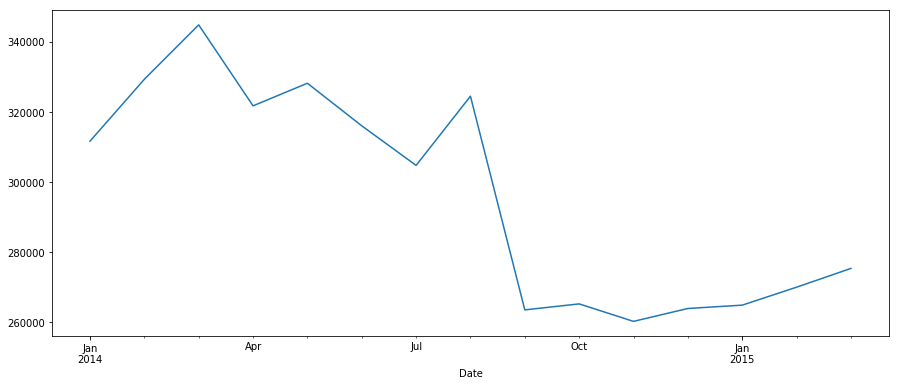

In [150]:
y.plot(figsize=(15, 6))
plt.show()

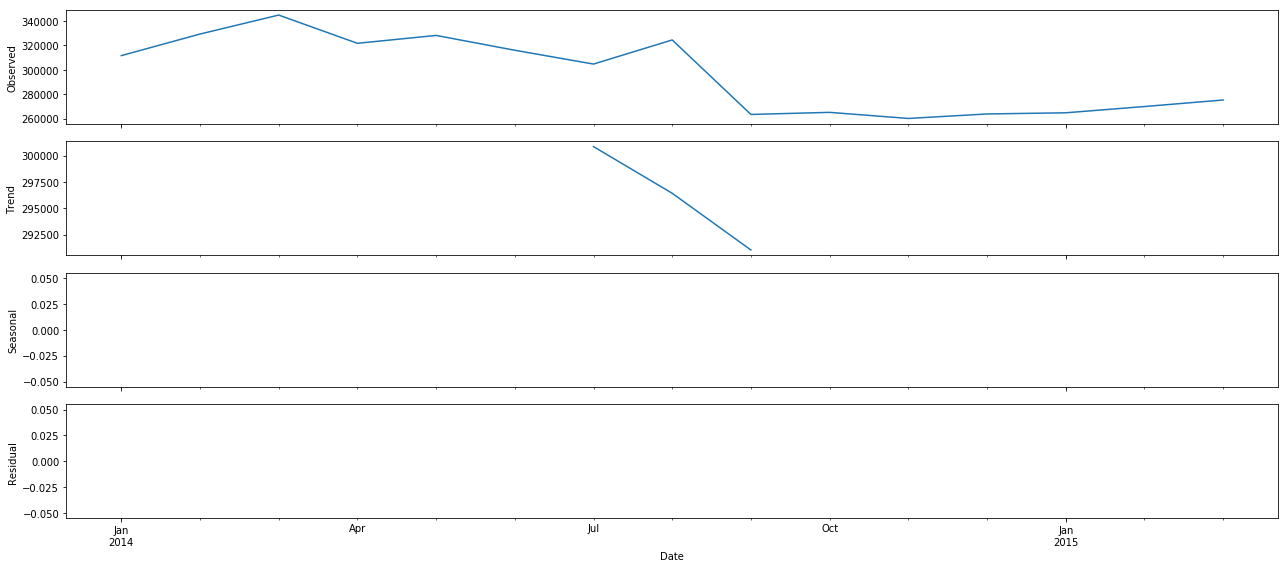

In [151]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [156]:
import itertools   
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [160]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)


            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:394.5436201299751
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:54.31057147216365
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:65.52256253816805
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:358.81682099758416
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:86.88475250776239
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:296.687026572941
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:23.506894389000703
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:34.14991918545968
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:274.94988403531175
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:49.37893224981036
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:320.6999871681739
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:40.98660982669003
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:49.24285322267459
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:298.2365881074669
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:50.78965180618101
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:297.3052278981721
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:27.561940598437296
ARIMA(1, 1, 1)x(0, 0,

In [171]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 0),seasonal_order=(0, 1, 0, 12),enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
#print(results.summary())
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.744e+07   1.43e+08      0.401      0.688   -2.23e+08    3.38e+08


ValueError: `dataset` input should have multiple elements.

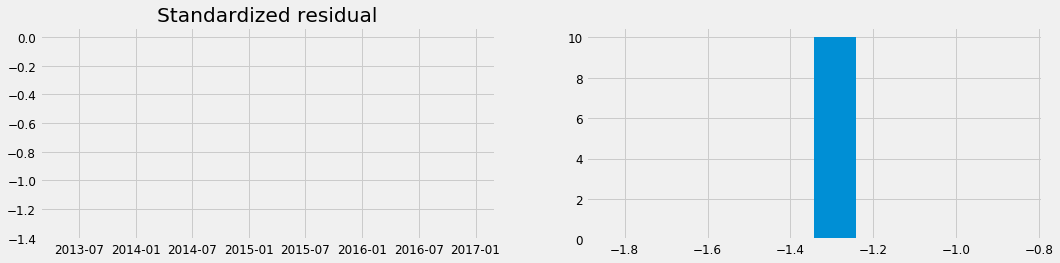

In [172]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

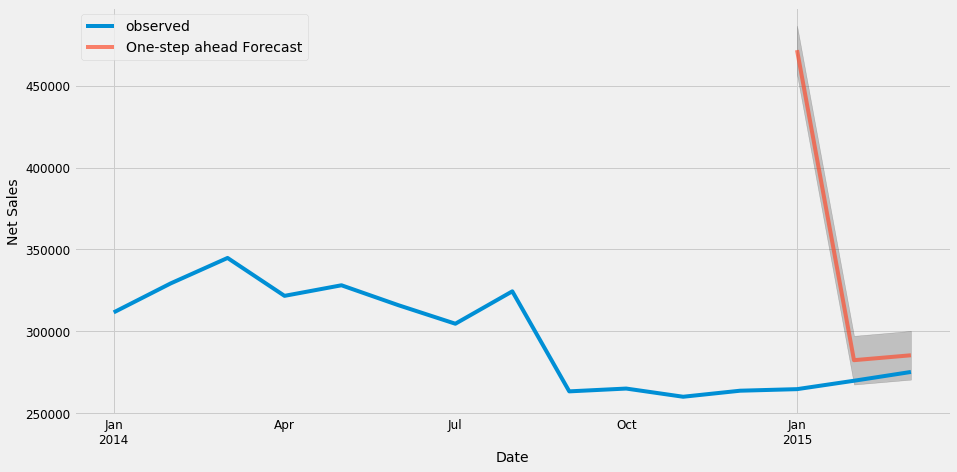

In [178]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Net Sales')
plt.legend()

plt.show()

In [175]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 14343013685.01


In [176]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 119762.32


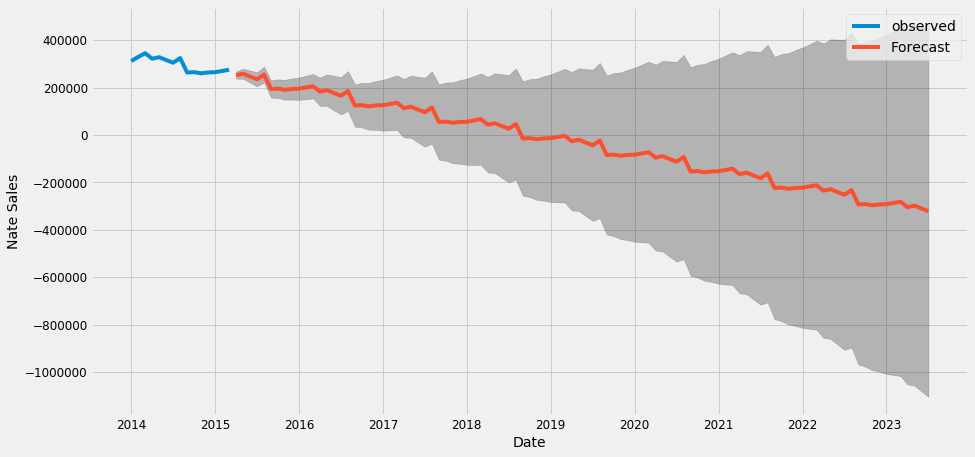

In [177]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Nate Sales')

plt.legend()
plt.show()

In [295]:
x = pd.read_csv('model.csv',sep='\t', encoding='utf-8')

In [296]:
x.shape

(43063, 13)

In [297]:
x.isna().sum()

Unnamed: 0                      0
Restaurant Name                 0
Date                            0
Net Sales                       0
POS Checks                      0
Labor Cost                      0
Game Revenue                20565
Go Live Date                13374
Franchise/Owner                 0
State                           0
Presto Devices Installed    12974
Month                           0
Year                            0
dtype: int64

In [298]:
cols = ['Unnamed: 0','Go Live Date','Franchise/Owner','State','Presto Devices Installed',
        'Restaurant Name','Month','Year','POS Checks','Labor Cost']
x.drop(cols, axis=1, inplace=True)

In [299]:
x.isna().sum()

Date                0
Net Sales           0
Game Revenue    20565
dtype: int64

In [300]:
x.to_csv('model123.csv', sep='\t', encoding='utf-8')

In [385]:
df2 = pd.read_csv('model123.csv',sep='\t', encoding='utf-8')
df2.drop('Unnamed: 0', axis=1, inplace=True)
df3 = pd.read_csv('model123.csv',sep='\t', encoding='utf-8')
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [386]:
cols = ['Game Revenue']
df2.drop(cols, axis=1, inplace=True)
cols1 = ['Net Sales']
df3.drop(cols1, axis=1, inplace=True)

In [387]:
df2.head()

,Date,Net Sales
0,2014-01-01,1687.00000000
1,2014-01-02,2182.00000000
2,2014-01-03,2772.00000000
3,2014-01-04,2253.00000000
4,2014-01-05,1390.00000000


In [388]:
df3.head()


,Date,Game Revenue
0,2014-01-01,nan
1,2014-01-02,nan
2,2014-01-03,nan
3,2014-01-04,nan
4,2014-01-05,nan


In [389]:
df2.isna().sum()


Date         0
Net Sales    0
dtype: int64

In [390]:
df3.isna().sum()

Date                0
Game Revenue    20565
dtype: int64

In [391]:
#df2 = df2.sort_values('Date')
#df3 = df3.sort_values('Date')  
df2['Date'] = pd.to_datetime(df2['Date'] )
df3['Date'] = pd.to_datetime(df3['Date'] )




In [392]:
df2= df2.groupby('Date')['Net Sales'].sum().reset_index()
df3 = df3.groupby('Date')['Game Revenue'].sum().reset_index()

df2 = df2.set_index('Date')
df3 = df3.set_index('Date')

y_df2 = df2['Net Sales'].resample('MS').mean()
y_df3 = df3['Game Revenue'].resample('MS').mean()

df2= pd.DataFrame({'Date':y_df2.index, 'Net Sales':y_df2.values})
df3 = pd.DataFrame({'Date': y_df3.index, 'Game Revenue': y_df3.values})

df4 = df2.merge(df3, how='inner', on='Date')
df4.rename(columns={'Sales_x': 'Net Sales', 'Sales_y': 'Game Revenue'}, inplace=True)
df4.head()

,Date,Net Sales,Game Revenue
0,2014-01-01,311634.69419355,469.07526882
1,2014-02-01,329304.77821429,511.48511905
2,2014-03-01,344842.96677419,590.51881720
3,2014-04-01,321724.52233333,574.69722222
4,2014-05-01,328175.80322581,629.63172043


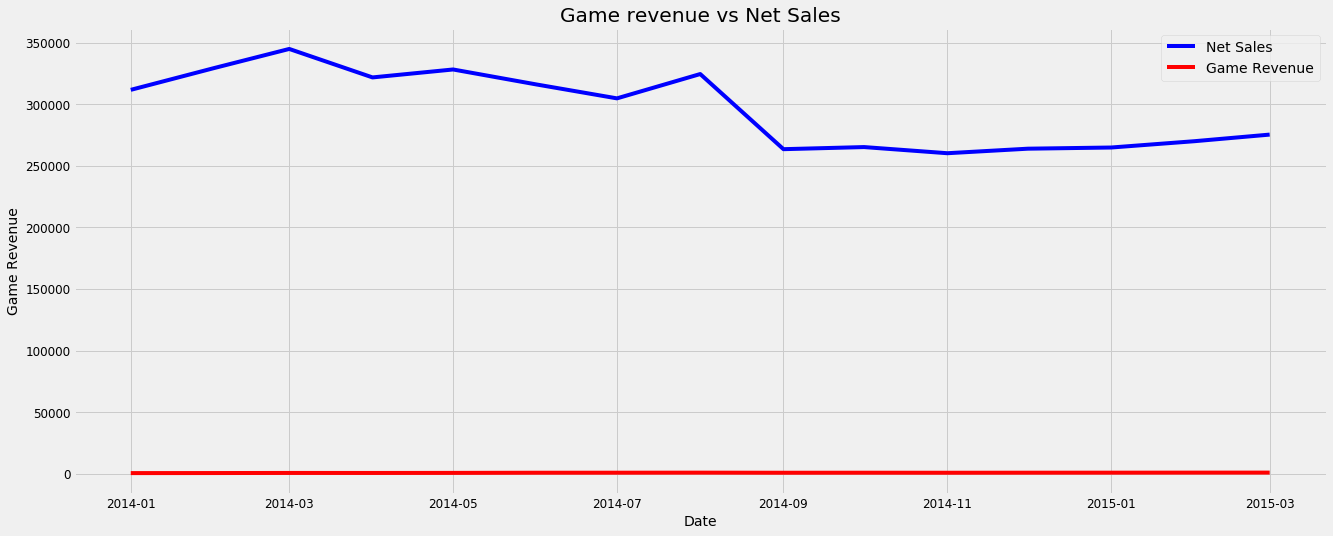

In [396]:
plt.figure(figsize=(20, 8))
plt.plot(df4['Date'], df4['Net Sales'], 'b-', label = 'Net Sales')
plt.plot(df4['Date'], df4['Game Revenue'], 'r-', label = 'Game Revenue')
plt.xlabel('Date'); plt.ylabel('Revenue()'); plt.title('Game revenue vs Net Sales')
plt.legend();

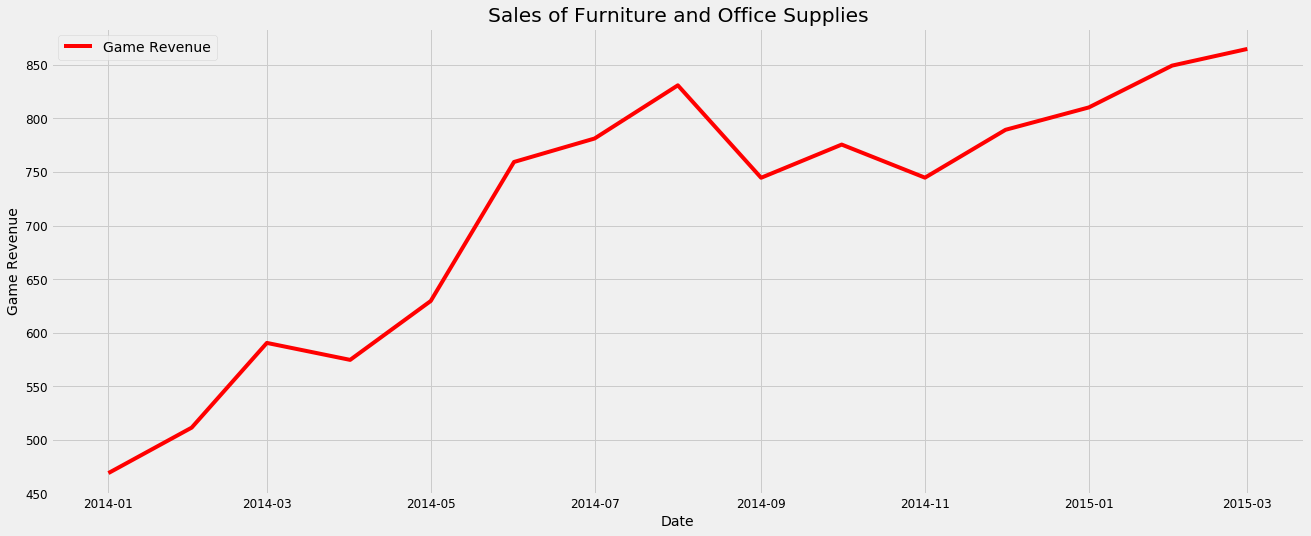

In [377]:
plt.figure(figsize=(20, 8))
plt.plot(df3['Date'], df3['Game Revenue'], 'r-', label = 'Game Revenue')
plt.xlabel('Date'); plt.ylabel('Game Revenue'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [381]:
from fbprophet import Prophet

df2 = df2.rename(columns={'Date': 'ds', 'Net Sales': 'y'})
df2_model = Prophet(interval_width=0.95)
df2_model.fit(df2)


df3 = df3.rename(columns={'Date': 'ds', 'Game Revenue': 'y'})
df3_model = Prophet(interval_width=0.95)
df3_model.fit(df3)

df2_forecast = df2_model.make_future_dataframe(periods=36, freq='MS')
df2_forecast = df2_model.predict(df2_forecast)

df3_forecast = df3_model.make_future_dataframe(periods=36, freq='MS')
df3_forecast = df3_model.predict(df3_forecast)

plt.figure(figsize=(18, 6))
df2.plot(df2_forecast, xlabel = 'Date', ylabel = 'Net Sales')
plt.title('Net Sales');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.


ValueError: Must pass DataFrame with boolean values only

<Figure size 1296x432 with 0 Axes>